<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Classification and KNN with NHL data

_Authors: Joseph Nelson (DC)_

---

Below you will practice KNN classification on a dataset of NHL statistics.

You will be predicting the `Rank` of a team from predictor variables of your choice.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
# web location:
web_csv = 'https://raw.githubusercontent.com/josephofiowa/GA-DSI/master/NHL_Data_GA.csv'
local_csv = './datasets/NHL_Data_GA.csv'

### 1. Load the NHL data

In [3]:
# A:
NHL = pd.read_csv(local_csv)

### 2. Perform any required data cleaning. Do some EDA.

In [10]:
NHL.head(3)

,Team,PTS,Rank,TOI,GF,GA,GF60,GA60,GF%,SF,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
0,Washington10,121,1,2001:52:00,115,73,3.45,2.19,61.2,1112,...,51.3,2138,1935,64.1,58.0,52.5,10.34,93.03,1034,1269
1,Vancouver11,117,1,2056:14:00,94,72,2.74,2.10,56.6,1143,...,53.1,2144,1870,62.6,54.6,53.4,8.22,93.16,1014,985
2,San Jose10,113,1,1929:54:00,90,68,2.80,2.11,57.0,1065,...,50.9,1985,1876,61.7,58.3,51.4,8.45,93.46,1019,1195


In [20]:
NHL.describe()

,PTS,Rank,GF,GA,GF60,GA60,GF%,SF,SA,SF60,...,FF%,CF,CA,CF60,CA60,CF%,Sh%,Sv%,PDO,PIM
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,...,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,91.977778,2.022222,83.288889,83.288889,2.442222,2.444000,49.981111,1068.333333,1068.333333,31.252222,...,49.966667,1973.466667,1973.466667,57.735556,57.798889,49.972222,7.814556,92.182556,999.988889,990.966667
std,12.524114,0.820767,10.376339,9.694484,0.325331,0.313522,4.644554,95.929047,75.514118,2.237637,...,2.797913,176.468299,154.148928,4.124476,4.291106,2.844313,0.866942,0.928621,12.292772,178.049321
min,62.000000,1.000000,57.000000,64.000000,1.700000,1.730000,38.000000,815.000000,868.000000,25.800000,...,43.100000,1565.000000,1572.000000,49.500000,46.700000,43.700000,5.900000,89.830000,978.000000,689.000000
25%,82.250000,1.000000,76.000000,75.500000,2.232500,2.202500,46.825000,1011.500000,1022.250000,29.550000,...,47.775000,1855.250000,1877.000000,54.275000,54.600000,47.925000,7.235000,91.555000,992.000000,881.250000
50%,92.500000,2.000000,84.000000,84.000000,2.400000,2.495000,49.700000,1072.000000,1072.000000,31.400000,...,50.050000,1981.500000,1961.000000,58.050000,58.350000,50.400000,7.730000,92.250000,1000.500000,960.000000
75%,102.000000,3.000000,90.000000,89.000000,2.600000,2.670000,53.625000,1143.000000,1125.750000,32.775000,...,51.775000,2112.750000,2077.250000,60.850000,60.400000,52.000000,8.270000,92.870000,1007.750000,1101.500000
max,121.000000,3.000000,115.000000,107.000000,3.450000,3.240000,61.200000,1311.000000,1245.000000,35.600000,...,58.100000,2341.000000,2332.000000,64.900000,67.500000,57.100000,10.340000,93.940000,1034.000000,1515.000000


In [37]:
NHL.columns

Index([u'Team', u'PTS', u'Rank', u'TOI', u'GF', u'GA', u'GF60', u'GA60',
       u'GF%', u'SF', u'SA', u'SF60', u'SA60', u'SF%', u'FF', u'FA', u'FF60',
       u'FA60', u'FF%', u'CF', u'CA', u'CF60', u'CA60', u'CF%', u'Sh%', u'Sv%',
       u'PDO', u'PIM'],
      dtype='object')

In [47]:
# A:
percent = [x for x in NHL.columns if '%' in x]
integer = [x for x in NHL.columns if x not in percent]
integer.remove('Team')
integer.remove('Rank')
integer.remove('TOI')
integer

['PTS',
 'GF',
 'GA',
 'GF60',
 'GA60',
 'SF',
 'SA',
 'SF60',
 'SA60',
 'FF',
 'FA',
 'FF60',
 'FA60',
 'CF',
 'CA',
 'CF60',
 'CA60',
 'PDO',
 'PIM']

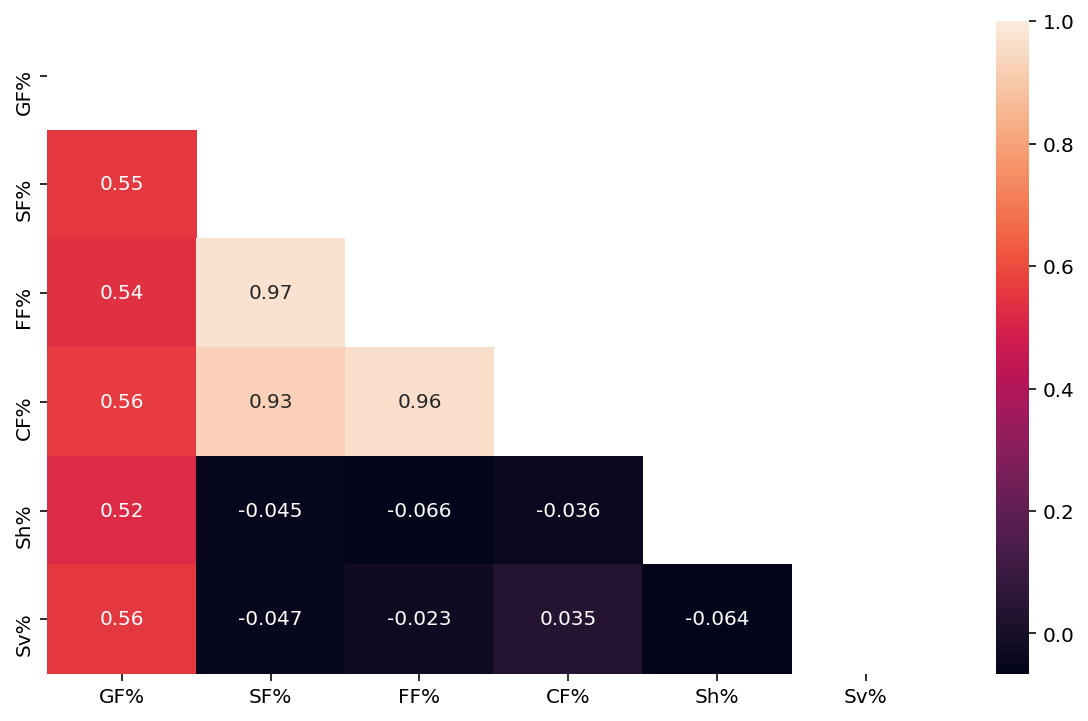

In [49]:
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(10,6))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(NHL[percent].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(NHL[percent].corr(), mask=mask, annot=True)

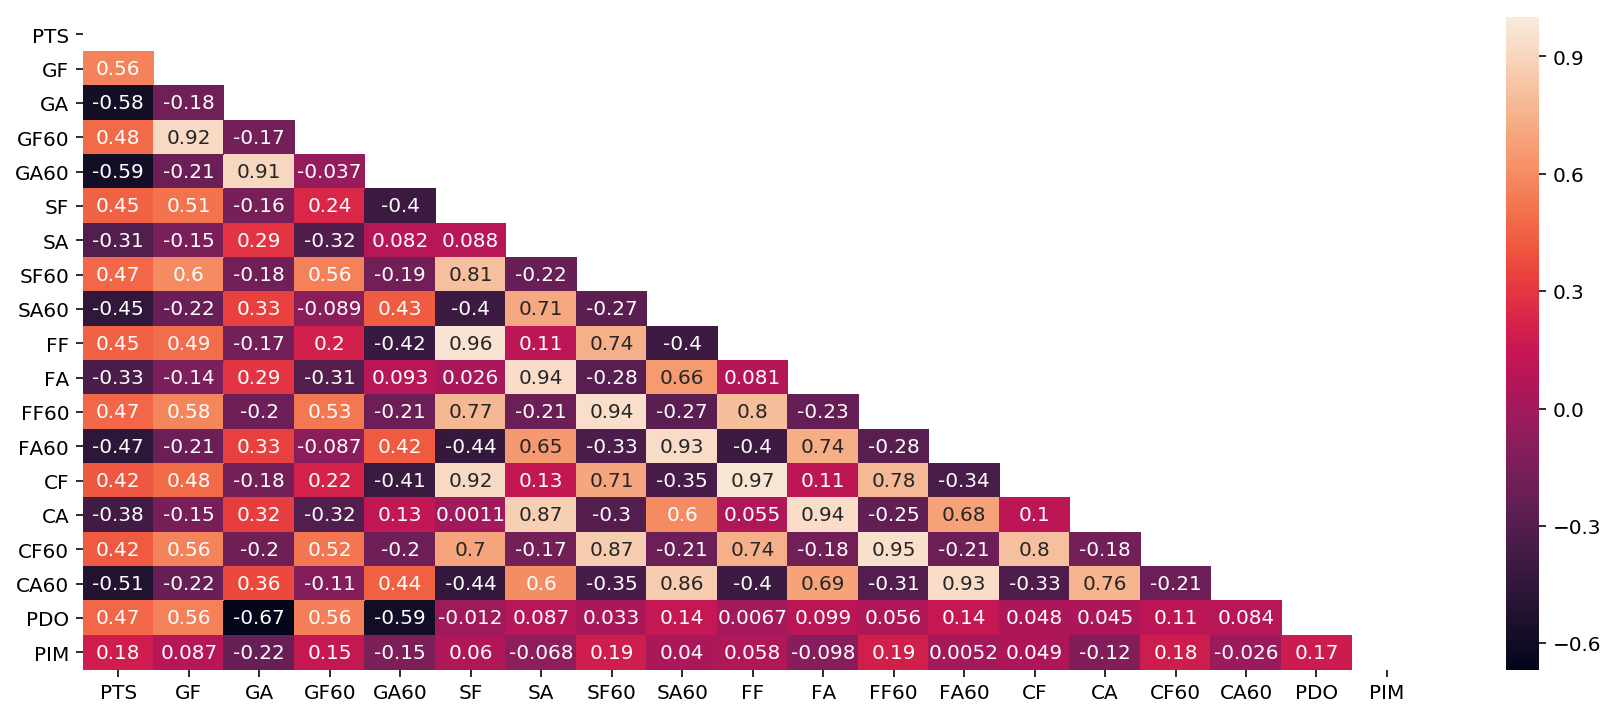

In [51]:
# Set the default matplotlib figure size:
fig, ax = plt.subplots(figsize=(15,6))

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(NHL[integer].corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plot the heatmap with seaborn.
# Assign the matplotlib axis the function returns. This will let us resize the labels.
ax = sns.heatmap(NHL[integer].corr(), mask=mask, annot=True)

### 3. Set up the `Rank` variable as your target. How many classes are there?

In [22]:
# A:
print NHL.Rank.unique()
print len(NHL.Rank.unique())

[1 2 3]
3


### 4. What is the baseline accuracy?

In [29]:
# A:
for i in range(1,4):
    print 'Count of Rank ' + str(i) + ': '  + str(len(NHL[NHL['Rank'] == i ]))


Count of Rank 1: 29
Count of Rank 2: 30
Count of Rank 3: 31


### 5. Choose 4 features to be your predictor variables and set up your design matrix.

In [54]:
# A:
y = NHL['Rank'].values
X = NHL[percent]

### 6. Fit a `KNeighborsClassifier` with 1 neighbor using the target and predictors.

In [55]:
# A:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
Xs = ss.fit_transform(X)

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors = 1)
neigh.fit(X, y)
predict()

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

### 7. Evaluate the accuracy of your model.
- Is it better than baseline?
- Is it legitimate?

In [9]:
# A:

### 8. Create a 50-50 train-test-split of your target and predictors. Refit the KNN and assess the accuracy.

In [10]:
# A:

### 9. Evaluate the test accuracy of a KNN where K == number of rows in the training data.

In [11]:
# A:

### 10. Fit the KNN at values of K from 1 to the number of rows in the training data.
- Store the test accuracy in a list.
- Plot the test accuracy vs. the number of neighbors.

In [12]:
# A:

### 11. Fit KNN across different values of K and plot the mean cross-validated accuracy with 5 folds.

In [13]:
# A:

### 12. Standardize the predictor matrix and cross-validate across the different K.
- Plot the standardized mean cross-validated accuracy against the unstandardized. Which is better?
- Why?

In [14]:
# A: